# Análisis de Tweets

- Mario Horacio Garrido Czacki
- E. David Guzmán Ramírez

Generar un identificador de tendencias de tweets, para la descarga no se usarán filtros, sin
embargo, los tweets deberán contener las palabras de ’UNAM’, ’virus’, ’hospital’,’covid-19’. Debes graficar las primeras 10 tendencias por día y agrupados durante todo el periodo de
recolección.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ast

import seaborn as sns
sns.set(style="darkgrid", font='serif')

# plt.rc('text', usetex=True)
# plt.rc('font', family='serif')

In [2]:
tweets = pd.read_csv('Datos/totales_historicos.csv')
tweets.head()

,created_at,text,coordinates,hashtags
0,2020-05-20 18:22:39,Un poquito de mi oaxaca. @MezcalConvite https:...,NaN,[]
1,2020-05-20 18:22:39,@ramonpenafranco Si bien les va,NaN,[]
2,2020-05-20 18:22:39,Acaba de publicar una foto en Copiadoras Delta...,"{'type': 'Point', 'coordinates': [-98.8841629,...",[]
3,2020-05-20 18:22:40,When the servers are down but somehow I can ge...,NaN,[]
4,2020-05-20 18:22:40,#ÚltimaHora | Este año la peregrinación de #Qu...,NaN,"[{'text': 'ÚltimaHora', 'indices': [0, 11]}, {..."


In [3]:
def split_hashtags(hashtag):
    """
    Separa los hashtags del dataframe.
    """
    x_split = hashtag[1:-2].split('}, ')
    
    if len(x_split[0]) > 1:
        hashtags = []

        for x in x_split:
            x = x + '}'
            dict_hashtag = ast.literal_eval(x)
            hashtags.append('#' + dict_hashtag['text'])
            
        return hashtags
            
    else:
        return []

In [4]:
# Separamos los hashtags del dataframe
tweets['hashtags'] = tweets['hashtags'].apply(split_hashtags)
# Ponemos un formato de fecha
tweets['created_at'] = pd.to_datetime(tweets['created_at'], format = '%Y-%m-%d %H:%M:%S')

In [5]:
tweets.head(5)

,created_at,text,coordinates,hashtags
0,2020-05-20 18:22:39,Un poquito de mi oaxaca. @MezcalConvite https:...,NaN,[]
1,2020-05-20 18:22:39,@ramonpenafranco Si bien les va,NaN,[]
2,2020-05-20 18:22:39,Acaba de publicar una foto en Copiadoras Delta...,"{'type': 'Point', 'coordinates': [-98.8841629,...",[]
3,2020-05-20 18:22:40,When the servers are down but somehow I can ge...,NaN,[]
4,2020-05-20 18:22:40,#ÚltimaHora | Este año la peregrinación de #Qu...,NaN,"[#ÚltimaHora, #Querétaro, #Tepeyac]"


In [6]:
def get_trending_topics(data, por_dia = True):
    
    """
    Saca los trending topics de los datos.
    """
    
    if por_dia:
        hashtags_por_dia = []

        for day in [20,21,22,23,24]:
            dias = [True if x.day == day else False for x in data['created_at']]
            df = data[dias]

            hashtags = df['hashtags'].sum()
            uniques, counts = np.unique(hashtags, return_counts=True)

            hashtags_counts = pd.DataFrame(data = {'hashtag':uniques, 'cuenta':counts})
            hashtags_counts = hashtags_counts.sort_values('cuenta', ascending=False).reset_index(drop=True)

            hashtags_por_dia.append(hashtags_counts) 
            
        return hashtags_por_dia
    
    else:    
        hashtags = data['hashtags'].sum()
        uniques, counts = np.unique(hashtags, return_counts=True)

        hashtags_counts = pd.DataFrame(data = {'hashtag':uniques, 'cuenta':counts})
        hashtags_counts = hashtags_counts.sort_values('cuenta', ascending=False).reset_index(drop=True)
            
        return hashtags_counts
        

## Tendencias por día

### Filtrando a aquellos que tienen las palabras ’UNAM’, ’virus’, ’hospital’,’covid-19’

In [7]:
candidatos = [True if ('unam' in tweet.lower()) or ('virus' in tweet.lower())
             or ('hospital' in tweet.lower()) or ('covid-19' in tweet.lower())
             else False for tweet in tweets['text']]

tweets_candidatos = tweets[candidatos]

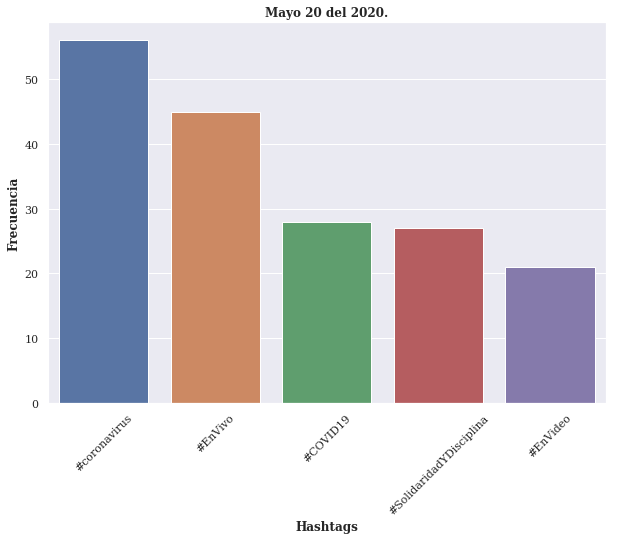

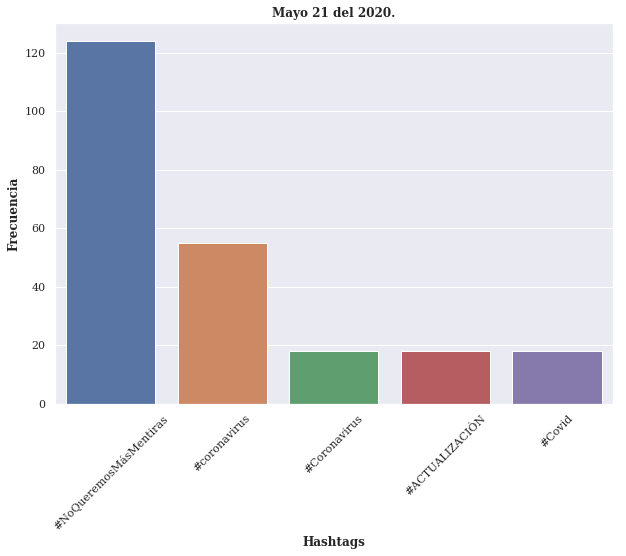

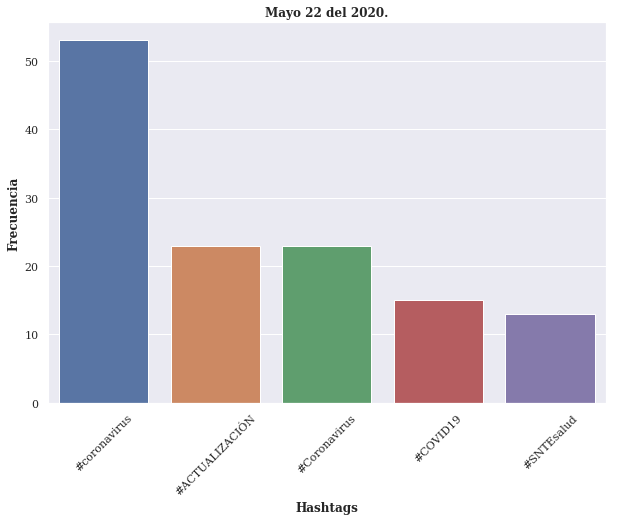

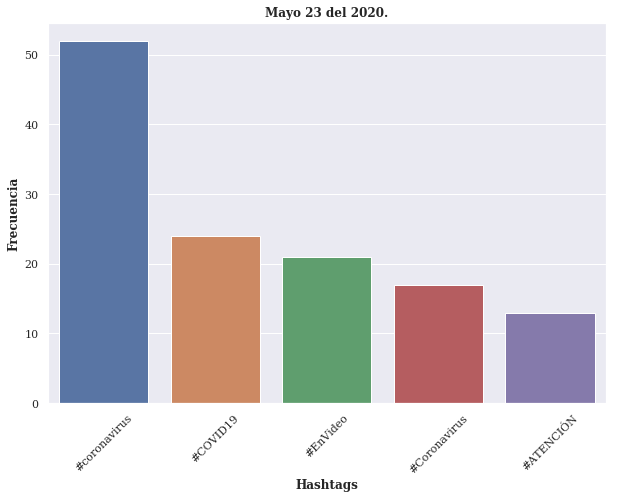

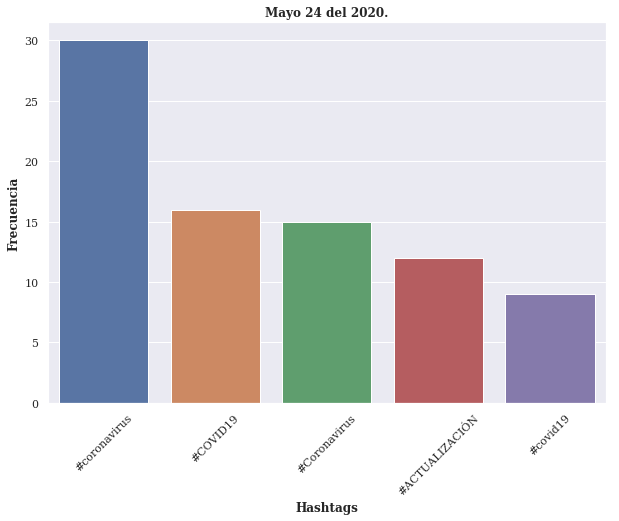

In [8]:
hashtags = get_trending_topics(tweets_candidatos)

for i,day in enumerate(hashtags): 
    plt.figure(figsize=(10,7))

    sns.barplot(day.loc[0:4]['hashtag'], day.loc[0:4]['cuenta'])
    plt.xticks(rotation=45)

    plt.xlabel('Hashtags', weight = 'bold')
    plt.ylabel('Frecuencia', weight = 'bold')
    plt.title('Mayo ' + str(20+i) + ' del 2020.', weight = 'bold')
    
    plt.show()

### Sin filtrar

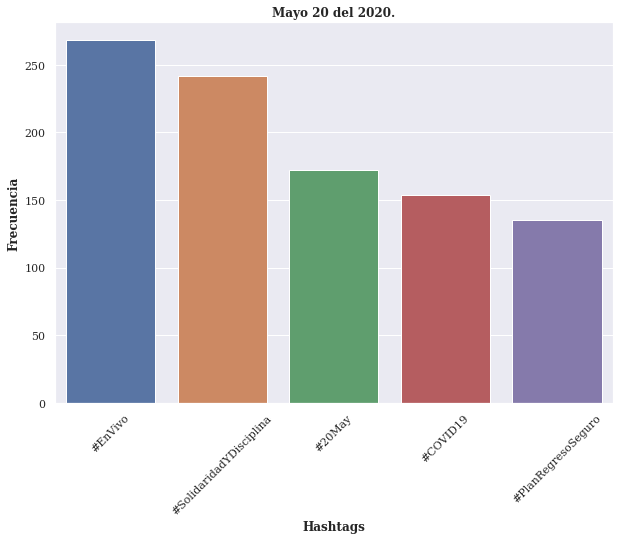

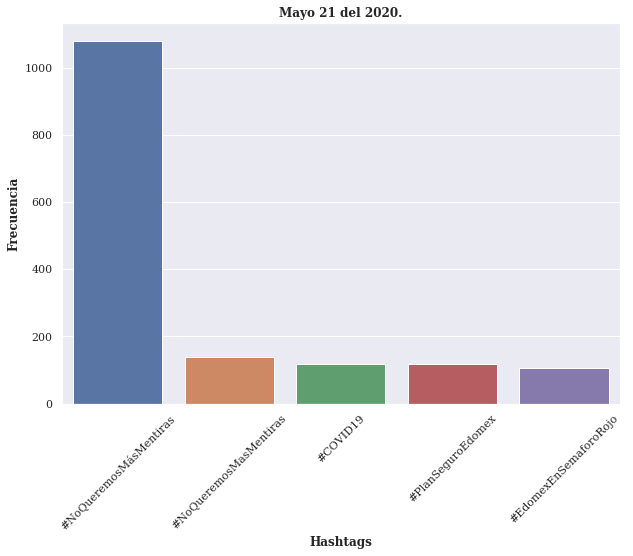

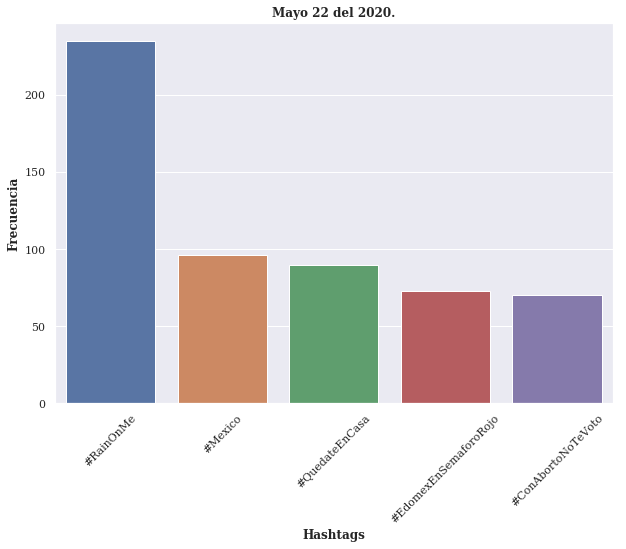

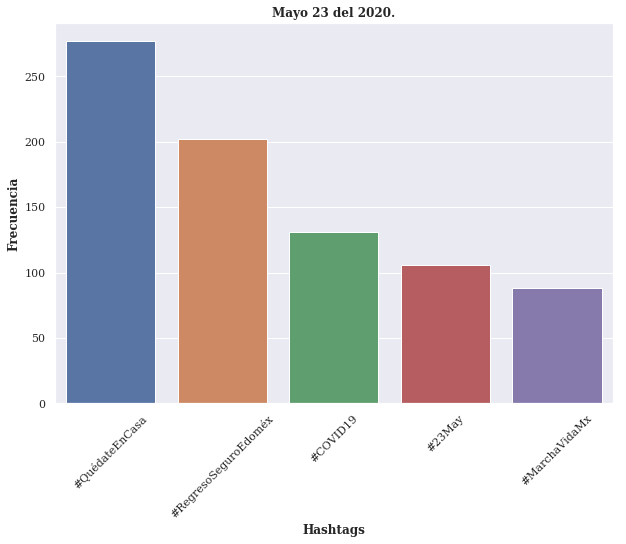

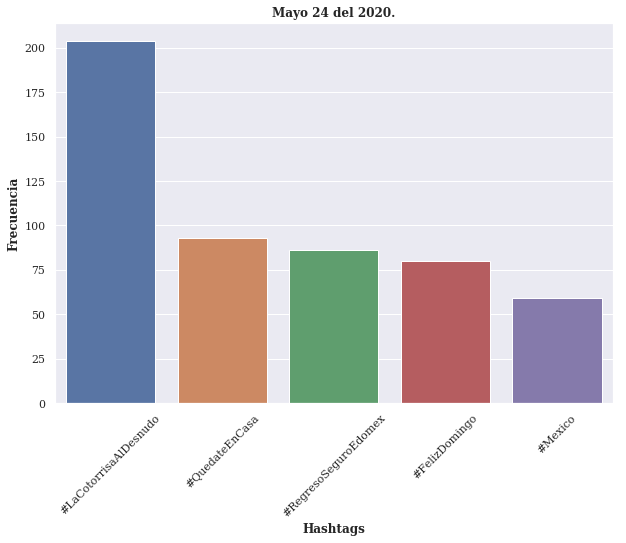

In [9]:
hashtags = get_trending_topics(tweets)

for i,day in enumerate(hashtags): 
    plt.figure(figsize=(10,7))

    sns.barplot(day.loc[0:4]['hashtag'], day.loc[0:4]['cuenta'])
    plt.xticks(rotation=45)

    plt.xlabel('Hashtags', weight = 'bold')
    plt.ylabel('Frecuencia', weight = 'bold')
    plt.title('Mayo ' + str(20+i) + ' del 2020.', weight = 'bold')
    
    plt.show()

## Tendencias en el periodo de recolección

### Filtrando a aquellos que tienen las palabras ’UNAM’, ’virus’, ’hospital’,’covid-19’

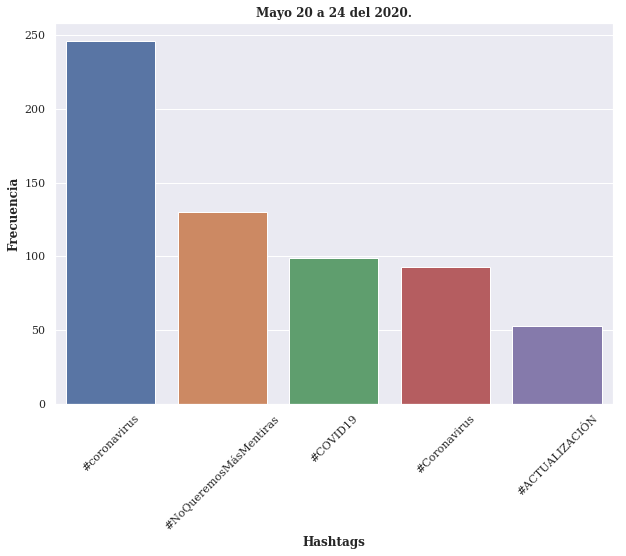

In [10]:
hashtags = get_trending_topics(tweets_candidatos, por_dia=False)

plt.figure(figsize=(10,7))

sns.barplot(hashtags.loc[0:4]['hashtag'], hashtags.loc[0:4]['cuenta'])
plt.xticks(rotation=45)

plt.xlabel('Hashtags', weight = 'bold')
plt.ylabel('Frecuencia', weight = 'bold')
plt.title('Mayo 20 a 24 del 2020.', weight = 'bold')
    
plt.show()

### Sin filtros

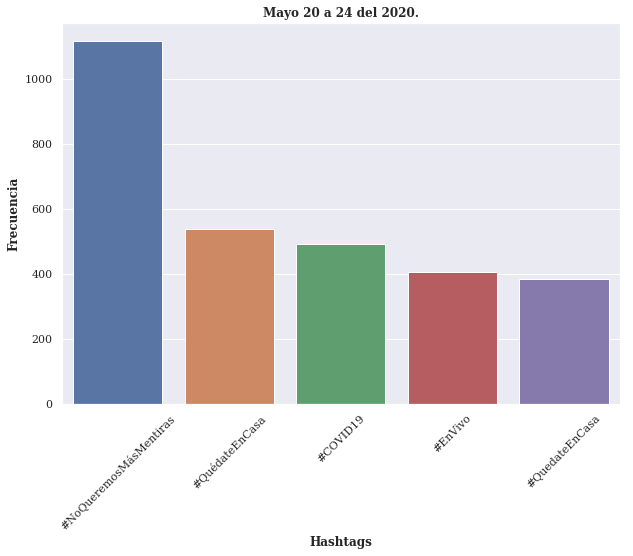

In [11]:
hashtags = get_trending_topics(tweets, por_dia=False)

plt.figure(figsize=(10,7))

sns.barplot(hashtags.loc[0:4]['hashtag'], hashtags.loc[0:4]['cuenta'])
plt.xticks(rotation=45)

plt.xlabel('Hashtags', weight = 'bold')
plt.ylabel('Frecuencia', weight = 'bold')
plt.title('Mayo 20 a 24 del 2020.', weight = 'bold')
    
plt.show()

## Mapa

In [76]:
import folium
import folium.plugins as plugins

In [101]:
minutos = [str(x)[0:16] for x in tweets_coordinates['created_at']]
minutos = sorted(np.unique(minutos))

In [93]:
def get_coordinates(x):
    dict_coord = ast.literal_eval(x)
    return dict_coord['coordinates']

In [95]:
tweets_coordinates = tweets[tweets['coordinates'].isnull() == False].reset_index(drop=True)
tweets_coordinates['minutos'] = tweets_coordinates['created_at'].apply(lambda x:str(x)[0:16])
tweets_coordinates['coordinates'] = tweets_coordinates['coordinates'].apply(get_coordinates)

In [102]:
data_minutos = []

for minuto in minutos:
    df = tweets_coordinates[tweets_coordinates['minutos'] == minuto]
    data_aux = []
        
    if df.shape[0] == 0:
        data_minutos.append([])
    else:
        for i in df.index:
            coordenadas = df.loc[i]['coordinates']
            long, lat = coordenadas
            data_aux.append([lat,long,1])
            
    data_minutos.append(data_aux)  

In [109]:
m = folium.Map([19.42847,-99.12766], tiles='OpenStreetMap', zoom_start=5)

hm = plugins.HeatMapWithTime(
        data_minutos,
        index = minutos,
        radius=15,
        scale_radius=False,
        use_local_extrema = False, 
        auto_play = True,
        min_speed = 5,
        max_speed = 20,
        speed_step = 1
        ).add_to(m)

m.save('tweets_tiempo.html')

m